# Theoretical Uncertainties in the SPS model 
In this notebook I will quantify the theoretical uncertainties in SPS models by comparing the SEDs constructed using different spectral and isochrone libraries

In [1]:
import os,sys
import h5py
import numpy as np
# -- provabgs --
from provabgs import infer as Infer
from provabgs import models as Models

In [2]:
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

## read in ($\theta$, SED $f_\lambda$)  constructed using the fiducial setup
The fiducial setup uses a **MILES spectral and MIST isochrones libraries**. This sample has SPS parameters that generate SEDs that fall within the rough color cuts of BGS

In [3]:
dat_dir = '/Users/chahah/data/arcoiris/provabgs_cnf/'

ftheta = os.path.join(dat_dir, 'train.set0.thetas.npy')
thetas = np.load(ftheta)

fseds = os.path.join(dat_dir, 'train.set0.seds.npy')
seds_fid = np.load(fseds)

fwaves = os.path.join(dat_dir, 'train.set0.waves.npy')
waves_fid = np.load(fwaves)

In [38]:
w_lin = np.linspace(1e3, 1e4, 1000)

In [4]:
print(thetas.shape)

(29154, 13)


# compare fiducial SEDs to SEDs using different isochrone libraries

In [12]:
# BASEL spectral, PADOVA isochrone
waves_m2 = np.load(os.path.join(dat_dir, 'train.set0.miles_pdva.waves.npy'))
seds_m2 = np.load(os.path.join(dat_dir, 'train.set0.miles_pdva.seds.npy'))

waves_m3 = np.load(os.path.join(dat_dir, 'train.set0.miles_prsc.waves.npy'))
seds_m3 = np.load(os.path.join(dat_dir, 'train.set0.miles_prsc.seds.npy'))

waves_m4 = np.load(os.path.join(dat_dir, 'train.set0.miles_bsti.waves.npy'))
seds_m4 = np.load(os.path.join(dat_dir, 'train.set0.miles_bsti.seds.npy'))

# something wrong with GENEVA one
#waves_m5 = np.load(os.path.join(dat_dir, 'train.set0.miles_gnva.waves.npy'))
#seds_m5 = np.load(os.path.join(dat_dir, 'train.set0.miles_gnva.seds.npy'))

Text(0, 0.5, 'SED')

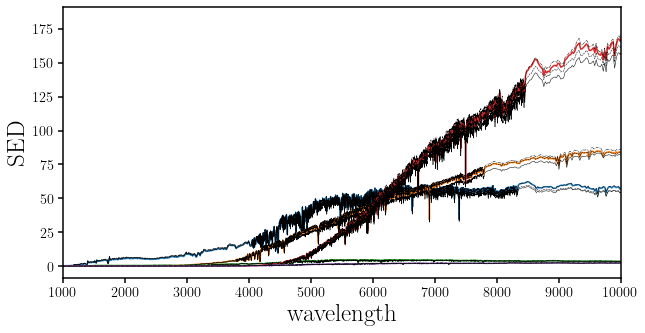

In [13]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for i in range(5): 
    sub.plot(waves_fid[i], seds_fid[i], c='C%i' % i)
    sub.plot(waves_m2[i], seds_m2[i], c='k', ls='--', lw=0.5)
    sub.plot(waves_m3[i], seds_m3[i], c='k', ls='-.', lw=0.5)
    sub.plot(waves_m4[i], seds_m4[i], c='k', ls='-', lw=0.5)
sub.set_xlabel('wavelength', fontsize=25)
sub.set_xlim(1e3, 1e4)
sub.set_ylabel('SED', fontsize=25)

There are clearly some significant wavelength-dependent differents for the different isochrone libraries...

## SED ratios

In [39]:
sed_ratios_m2 = np.array([np.interp(w_lin, waves_m2[i], seds_m2[i])/np.interp(w_lin, waves_fid[i], seds_fid[i]) for i in range(seds_fid.shape[0])])
sed_ratios_m3 = np.array([np.interp(w_lin, waves_m3[i], seds_m3[i])/np.interp(w_lin, waves_fid[i], seds_fid[i]) for i in range(seds_fid.shape[0])])
sed_ratios_m4 = np.array([np.interp(w_lin, waves_m4[i], seds_m4[i])/np.interp(w_lin, waves_fid[i], seds_fid[i]) for i in range(seds_fid.shape[0])])

In [40]:
sed_ratios_m2_q = np.quantile(sed_ratios_m2, [0.025, 0.16, 0.5, 0.84, 0.975], axis=0)
sed_ratios_m3_q = np.quantile(sed_ratios_m3, [0.025, 0.16, 0.5, 0.84, 0.975], axis=0)
sed_ratios_m4_q = np.quantile(sed_ratios_m4, [0.025, 0.16, 0.5, 0.84, 0.975], axis=0)

(0.0, 2.0)

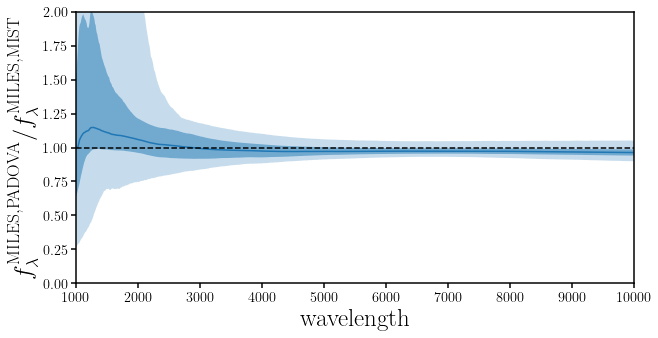

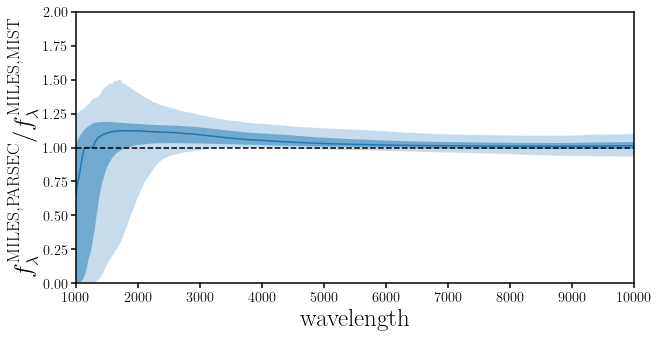

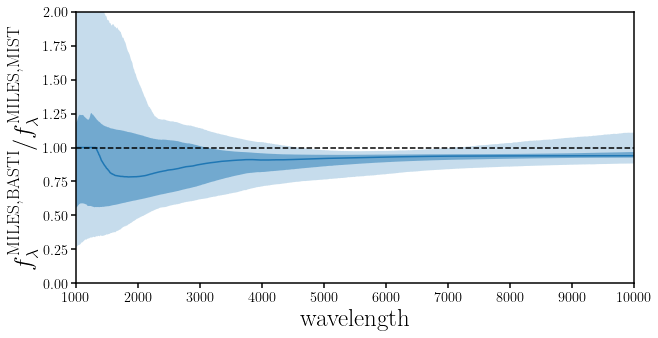

In [42]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.fill_between(w_lin, sed_ratios_m2_q[0], sed_ratios_m2_q[-1], facecolor='C0', edgecolor='none', alpha=0.25)
sub.fill_between(w_lin, sed_ratios_m2_q[1], sed_ratios_m2_q[-2], facecolor='C0', edgecolor='none', alpha=0.5)
sub.plot(w_lin, sed_ratios_m2_q[2], c='C0')
sub.plot([1e3, 1e4], [1., 1.], c='k', ls='--')
sub.set_xlabel('wavelength', fontsize=25)
sub.set_xlim(1e3, 1e4)
sub.set_ylabel(r'$f_\lambda^{\rm MILES, PADOVA}/f_\lambda^{\rm MILES, MIST}$', fontsize=25)
sub.set_ylim(0., 2.)

fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.fill_between(w_lin, sed_ratios_m3_q[0], sed_ratios_m3_q[-1], facecolor='C0', edgecolor='none', alpha=0.25)
sub.fill_between(w_lin, sed_ratios_m3_q[1], sed_ratios_m3_q[-2], facecolor='C0', edgecolor='none', alpha=0.5)
sub.plot(w_lin, sed_ratios_m3_q[2], c='C0')
sub.plot([1e3, 1e4], [1., 1.], c='k', ls='--')

sub.set_xlabel('wavelength', fontsize=25)
sub.set_xlim(1e3, 1e4)
sub.set_ylabel(r'$f_\lambda^{\rm MILES, PARSEC}/f_\lambda^{\rm MILES, MIST}$', fontsize=25)
sub.set_ylim(0., 2.)

fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.fill_between(w_lin, sed_ratios_m4_q[0], sed_ratios_m4_q[-1], facecolor='C0', edgecolor='none', alpha=0.25)
sub.fill_between(w_lin, sed_ratios_m4_q[1], sed_ratios_m4_q[-2], facecolor='C0', edgecolor='none', alpha=0.5)
sub.plot(w_lin, sed_ratios_m4_q[2], c='C0')
sub.plot([1e3, 1e4], [1., 1.], c='k', ls='--')

sub.set_xlabel('wavelength', fontsize=25)
sub.set_xlim(1e3, 1e4)
sub.set_ylabel(r'$f_\lambda^{\rm MILES, BASTI}/f_\lambda^{\rm MILES, MIST}$', fontsize=25)
sub.set_ylim(0., 2.)

The differences are quite dramatic for UV wavelengths

# compare fiducial SEDs to SEDs using different spectral libraries

In [17]:
waves_mm2 = np.load(os.path.join(dat_dir, 'train.set0.basel_mist.waves.npy'))
seds_mm2 = np.load(os.path.join(dat_dir, 'train.set0.basel_mist.seds.npy'))

Text(0, 0.5, 'SED')

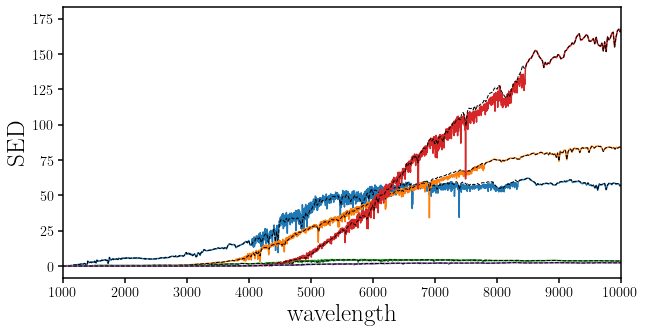

In [19]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for i in range(5): 
    sub.plot(waves_fid[i], seds_fid[i], c='C%i' % i)
    sub.plot(waves_mm2[i], seds_mm2[i], c='k', ls='--', lw=1)
sub.set_xlabel('wavelength', fontsize=25)
sub.set_xlim(1e3, 1e4)
sub.set_ylabel('SED', fontsize=25)

In [48]:
sed_ratios_mm2 = np.array([np.interp(w_lin, waves_mm2[i], seds_mm2[i])/np.interp(w_lin, waves_fid[i], seds_fid[i]) for i in range(seds_fid.shape[0])])

In [49]:
sed_ratios_mm2_q = np.quantile(sed_ratios_mm2, [0.025, 0.16, 0.5, 0.84, 0.975], axis=0)

(0.0, 2.0)

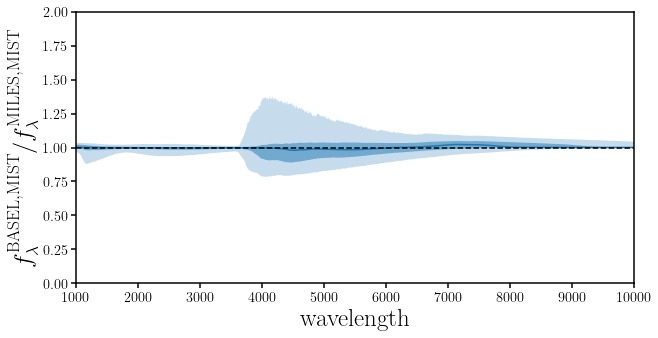

In [50]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.fill_between(w_lin, sed_ratios_mm2_q[0], sed_ratios_mm2_q[-1], facecolor='C0', edgecolor='none', alpha=0.25)
sub.fill_between(w_lin, sed_ratios_mm2_q[1], sed_ratios_mm2_q[-2], facecolor='C0', edgecolor='none', alpha=0.5)
sub.plot(w_lin, sed_ratios_mm2_q[2], c='C0')
sub.plot([1e3, 1e4], [1., 1.], c='k', ls='--')
sub.set_xlabel('wavelength', fontsize=25)
sub.set_xlim(1e3, 1e4)
sub.set_ylabel(r'$f_\lambda^{\rm BASEL, MIST}/f_\lambda^{\rm MILES, MIST}$', fontsize=25)
sub.set_ylim(0., 2.)

There isn't a significant bias from using a different spectral library but there seems to be a significant scatter.